In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name= fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
plt.rc('font',family=font_name)

import matplotlib as mlp
mlp.rcParams['axes.unicode_minus']=False

tips= sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1. 참고사이트
- https://matplotlib.org/
- https://seaborn.pydata.org/

## 2. 기본 그래프
- 선(line), 막대(bar), 히스토그램, 산포도(산점도, scatter), 상자(box)

## 3. 데이터의 종류

#### (1) 질적 데이터: 연산 불가
    - 요약 방법: 도표
    - 정리 방법: 도수 분포표, 분할표
    - 그래프: 막대 그래프(bar), 원 그래프(pie), 파이 그래프(pie), ...

#### (2) 양적 데이터: 연산 가능
    - 요약 방법: 숫자
    - 정리 방법: 산술 평균, 중앙값, ...
    - 그래프: 선 그래프(시계열), 히스토그램, 상자 그래프, 산포도

## 4. 그래프 그리기

### (1) 준비 작업
- figure(): 그래프의 영역을 생성
- add_subplot(): 그래프를 그리기 위한 위치 지정

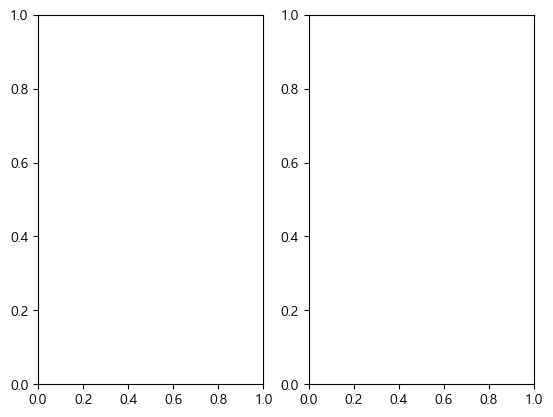

In [2]:
fig= plt.figure()        # 바탕 생성
axis1= fig.add_subplot(121)     # 1행 1열의 1번째 위치
axis2= fig.add_subplot(122)

### (2) 선 그래프
    matplotlib의 기본 그래프
    .cumsum(): 누적

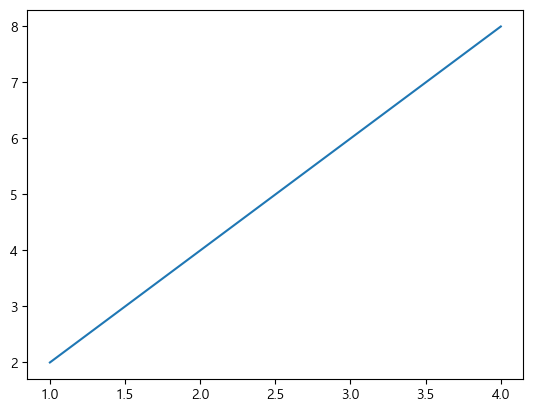

In [3]:
x= [1,2,3,4]
y= [2,4,6,8]

plt.plot(x,y)
# plt.show()    # 개발툴에서 사용할 때는 show() 써야함

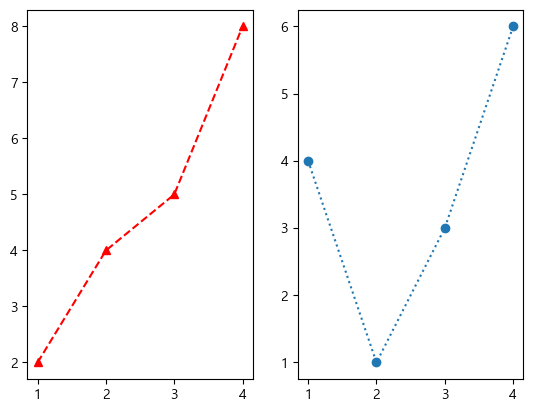

In [4]:
x= [1,2,3,4]
y= [2,4,5,8]

x2= np.array([1,2,3,4])
y2= np.array([4,1,3,6])

fig= plt.figure() 
axis1= fig.add_subplot(121)     # 1행 2열의 1번째 위치
axis2= fig.add_subplot(122)

axis1.plot(x,y, color='red', linestyle='dashed', marker='^')
axis2.plot(x2, y2, linestyle= 'dotted', marker='o')

<AxesSubplot:>

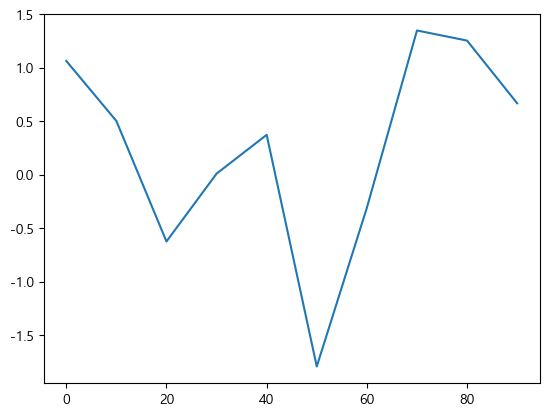

In [5]:
# 데이터가 Series일 때
s= pd.Series(np.random.randn(10), index= np.arange(0,100,10))    # index가 x축, 값이 y축 
s.plot.line()                          #np.arange(0부터 99까지 10간격)

<AxesSubplot:>

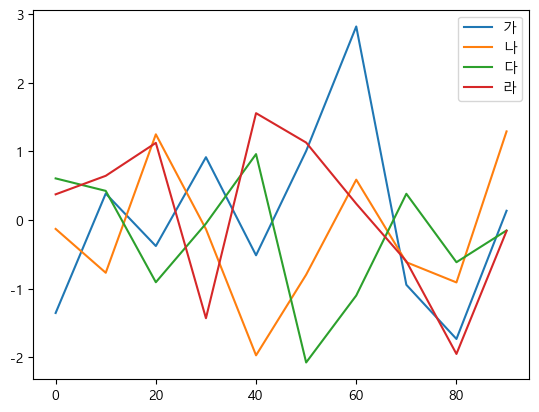

In [6]:
# 데이터가 DataFrame일 때
df= pd.DataFrame(np.random.randn(10,4), columns=['가','나','다','라'], index=np.arange(0,100,10))
df
df.plot()

<AxesSubplot:>

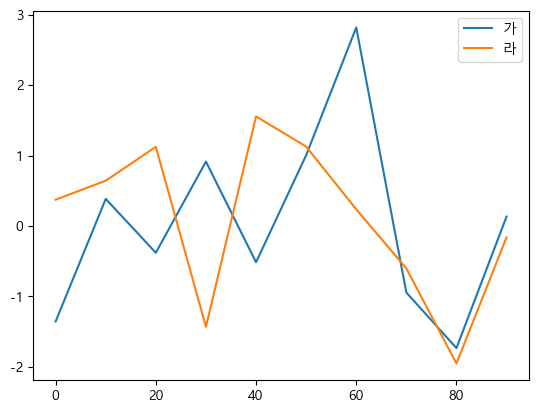

In [7]:
df[['가','라']].plot()

###  (3) 막대 그래프

<BarContainer object of 4 artists>

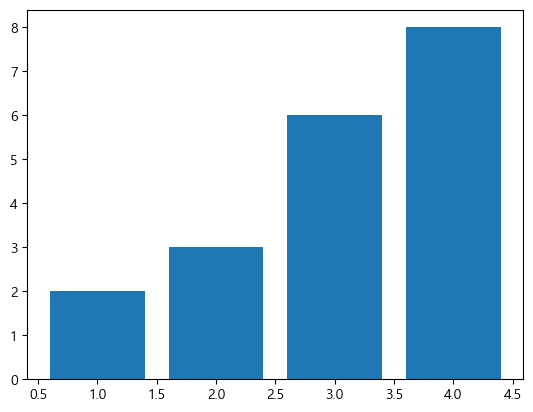

In [8]:
x=[1,2,3,4]
y=[2,3,6,8]

plt.bar(x,y)

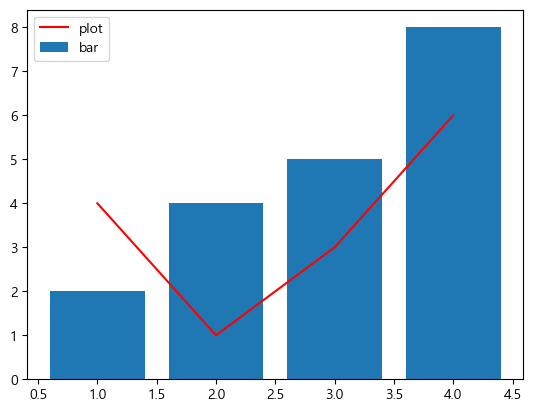

In [9]:
x= [1,2,3,4]
y= [2,4,5,8]

x2= np.array([1,2,3,4])
y2= np.array([4,1,3,6])

plt.bar(x,y, label='bar')       # 같은 plt에 누적해서 그려짐
plt.plot(x2,y2, color='r', label='plot')      # 다른 종류의 그래프 같이 그리기 가능
plt.legend()  # 범례도 조회

([<matplotlib.patches.Wedge at 0x1d838341be0>,
 [Text(1.0461621663333946, 0.3399186987098808, 'a'),
  Text(0.33991867422268784, 1.0461621742897658, 'b'),
  Text(-1.0461621902025062, 0.3399186252483017, 'c'),
  Text(0.3399188211458418, -1.0461621265515308, 'd')])

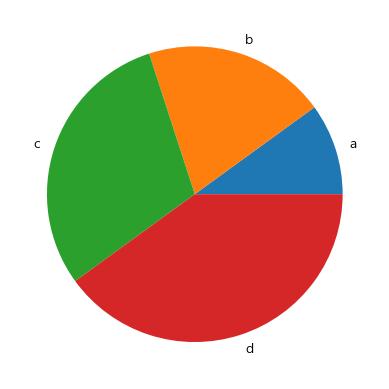

In [10]:
data= [1,2,3,4]
label= ['a','b','c','d']
plt.pie(data,labels=label)   # 원 그래프 pie

<AxesSubplot:>

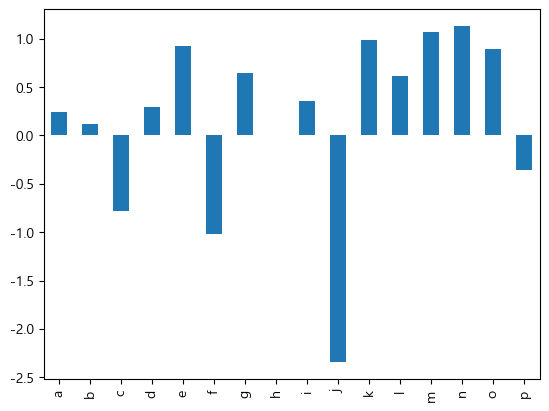

In [11]:
# 데이터가 Series일 때
s= pd.Series(np.random.randn(16), index= list('abcdefghijklmnop'))
s.plot(kind='bar')
s.plot.bar()

<AxesSubplot:>

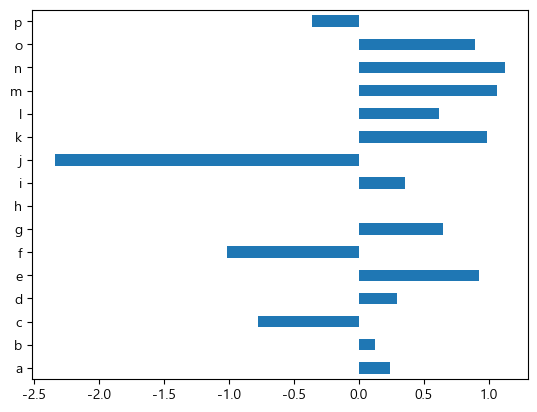

In [12]:
s.plot.barh()   # x축 y축 전환
s.plot(kind='barh')

<AxesSubplot:>

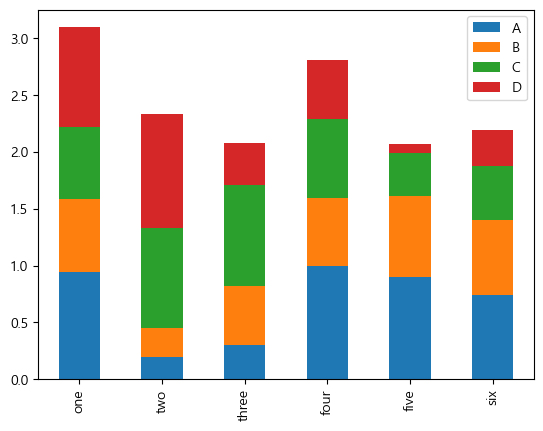

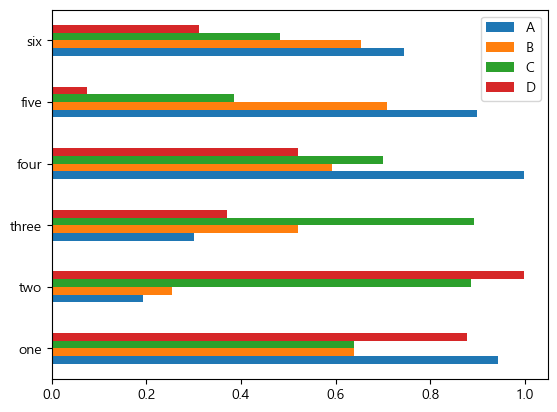

In [13]:
df= pd.DataFrame(np.random.rand(6,4),
                index=['one','two','three','four','five','six'],
                columns=['A','B','C','D'])       # 6행 4열 -> 행이 index니까 x축
df
df.plot(kind='bar', stacked=True)  # stacked=True: 하나로 쌓아서 보여주기
df.plot.barh()

### (4) Histogram
    막대그래프와 모양 비슷  -> 빈도 수
    히스토그램은 양적 데이터
- 막대 사이에 간격이 없다.
- 값만 필요. index 필요없음.


In [14]:
s= pd.Series(np.random.normal(0,1,size=100))
s

0    -0.172987
1    -1.491359
2    -0.708278
3    -1.416740
4     0.953749
        ...   
95   -0.646263
96   -0.424177
97    2.424394
98   -0.894697
99    2.495878
Length: 100, dtype: float64

<bound method PlotAccessor.bar of <pandas.plotting._core.PlotAccessor object at 0x000001D83855C370>>

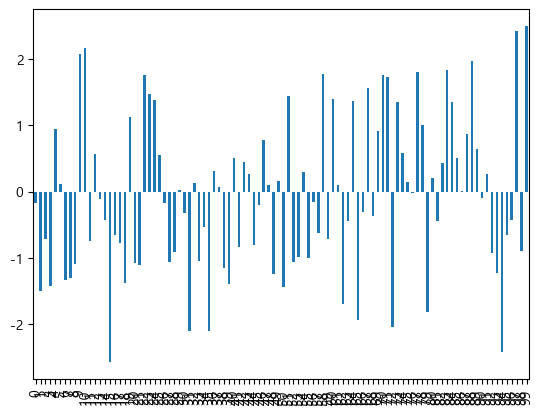

In [15]:
s.plot(kind='bar')
s.plot.bar

<AxesSubplot:>

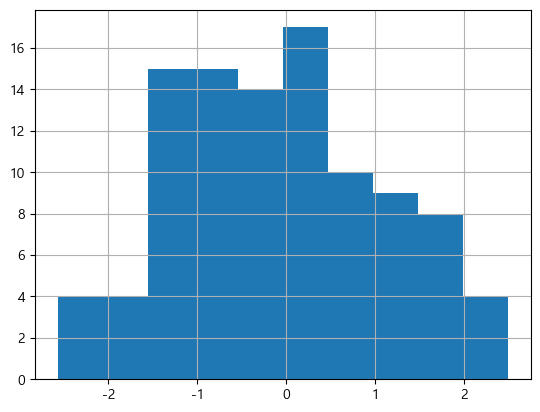

In [16]:
s.hist()    # y축은 빈도 수

<AxesSubplot:>

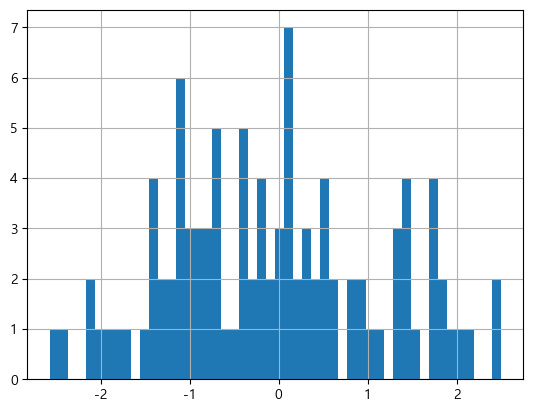

In [17]:
s.hist(bins=50)  #막대 개수 50개

### (5) Scatter Plot 산포도, 산점도
- 두 변수의 관계를 확인: 양수, 음수, 0(무작위)

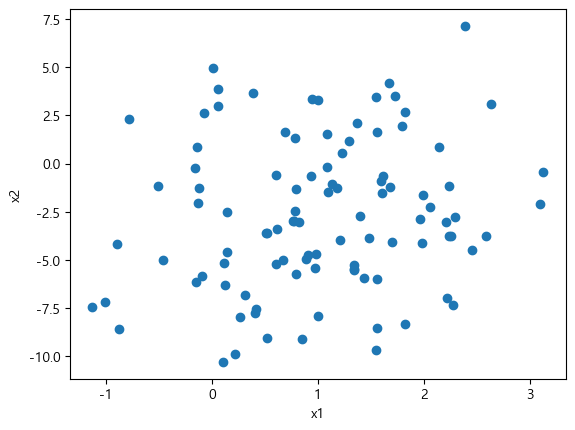

In [18]:
x1= np.random.normal(1,1,size=(100,1)) # 100행 1열  numpy.random.normal(평균, 표준편차, 개수)
x1

x2= np.random.normal(-2,4,size=(100,1))   # 100행 1열
x2

x=np.concatenate((x1,x2), axis=1) # 100행 2열로 합치기
x

df= pd.DataFrame(x, columns=['x1','x2'])
df

df.plot.scatter('x1','x2')
plt.scatter(df['x1'],df['x2'])

### (6) Box Plot
다양한 정보
- 사분위수 (25% / 50% / 75%)

<AxesSubplot:>

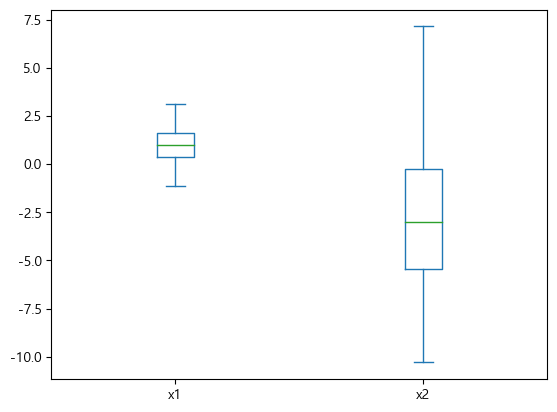

In [19]:
df.plot.box()

<AxesSubplot:>

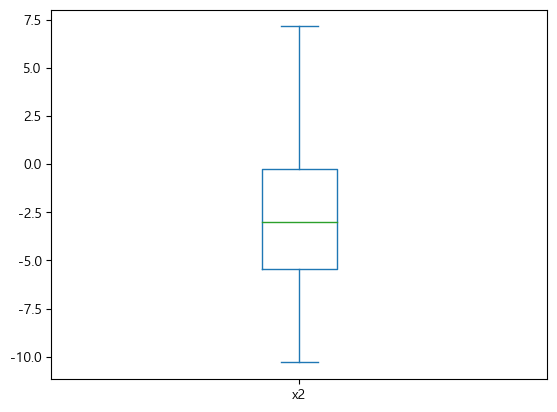

In [20]:
df['x2'].plot.box()

## 5. 실습-1

### (1) Data definition

In [21]:
tips= sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### (2) 시각화

#### 1) total_bill에 대한 금액 분포 확인
변수가 하나기 때문에 히스토그램

Text(0, 0.5, 'Frequency')

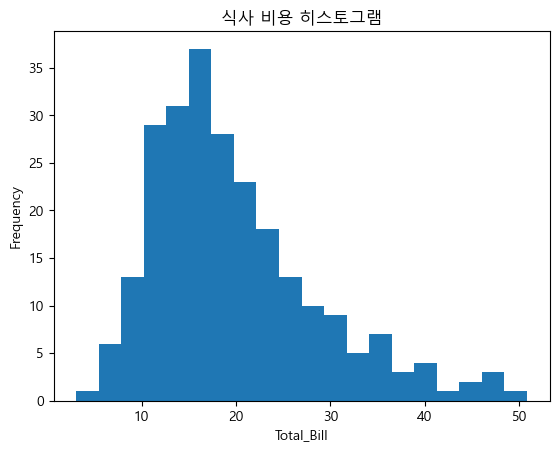

In [22]:
fig= plt.figure()
ax= fig.add_subplot(111)
ax.hist(tips['total_bill'],bins=20)
ax.set_title('식사 비용 히스토그램')
ax.set_xlabel('Total_Bill')
ax.set_ylabel('Frequency')
# tips['total_bill'].hist(bins=20)

#### 2) total_bill과 tip의 관계를 알고 싶다.
scatter 이용

Text(0, 0.5, 'tip')

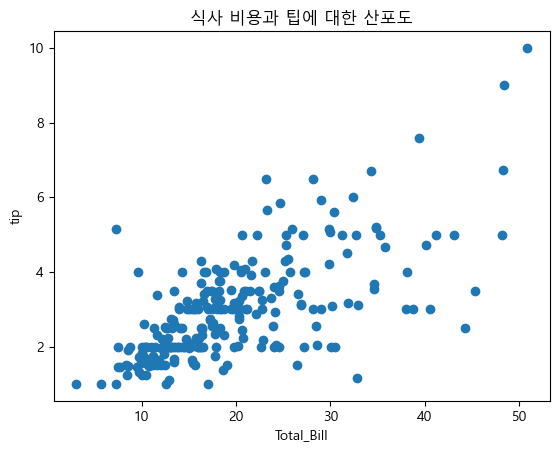

In [23]:
fig= plt.figure()
ax= fig.add_subplot(111)
ax.scatter(tips['total_bill'],tips['tip'])
ax.set_title('식사 비용과 팁에 대한 산포도')
ax.set_xlabel('Total_Bill')
ax.set_ylabel('tip')

# plt.scatter(tips['total_bill'],tips['tip'])

#### 3) 성별에 따른 total_bill과 tip의 관계
그래프를 겹칠 수 없으므로 남자와 여자의 색을 다르게

In [24]:
def record_sex(sex):
    if sex=='Female':
        return 0
    else:
        return 1
    
tips['sex_color']= tips['sex'].apply(record_sex)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


Text(0, 0.5, 'tip')

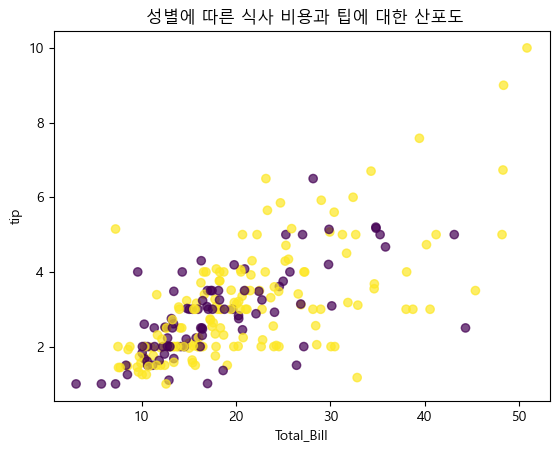

In [25]:
fig= plt.figure()
ax= fig.add_subplot(111)
ax.scatter(tips['total_bill'],tips['tip'], c=tips['sex_color'], alpha=0.7)
ax.set_title(' 성별에 따른 식사 비용과 팁에 대한 산포도')
ax.set_xlabel('Total_Bill')
ax.set_ylabel('tip')

# plt.scatter(tips['total_bill'],tips['tip'])

In [26]:
?plt.scatter

#### 4) 성별과 인원수에 따른 total_bill과 tip의 관계
점의 크기에 따른 점의 크기 변경

Text(0, 0.5, 'tip')

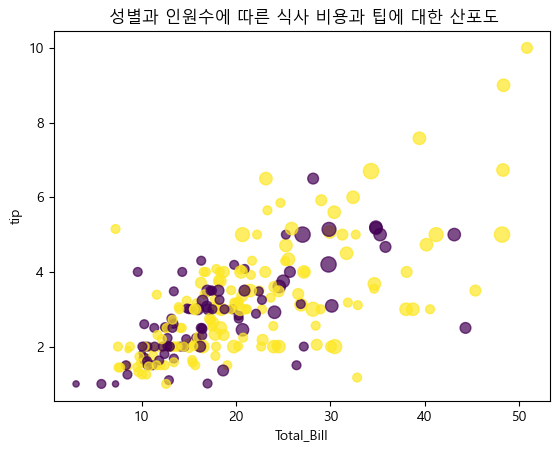

In [27]:
fig= plt.figure()
ax= fig.add_subplot(111)
ax.scatter(tips['total_bill'],tips['tip'], c=tips['sex_color'], alpha=0.7, s=tips['size']*20)
ax.set_title(' 성별과 인원수에 따른 식사 비용과 팁에 대한 산포도')
ax.set_xlabel('Total_Bill')
ax.set_ylabel('tip')

#### 5) 성별과 팁의 관계
    성별은 카테고리
    box plot을 이용
    box plot의 입력값은 한개의 데이터여야하기 때문에 하나로 묶어주기

Text(0.5, 1.0, ' 성별에 따른 tip')

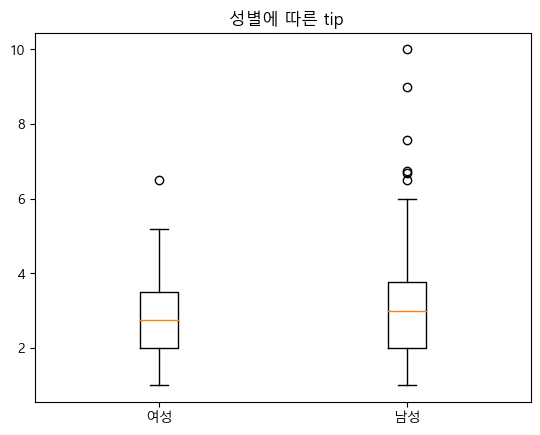

In [28]:
fig= plt.figure()
ax= fig.add_subplot(111)
ax.boxplot([tips[tips['sex']=='Female']['tip'],tips[tips['sex']=='Male']['tip']], labels=['여성','남성'])
ax.set_title(' 성별에 따른 tip')


In [29]:
?plt.boxplot

## 6. 실습2
- 전국 신규 민간아파트 분양가격 동향

### (1) Data Definition

In [30]:
# pandas로 파일 불러오기
apt=pd.read_csv('data/20200331.csv', encoding='euc-kr')
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4590 non-null   object
 1   규모구분     4590 non-null   object
 2   연도       4590 non-null   int64 
 3   월        4590 non-null   int64 
 4   분양가격(㎡)  4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


In [31]:
apt.head(10)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
5,인천,전체,2015,10,3163
6,인천,전용면적 60㎡이하,2015,10,3488
7,인천,전용면적 60㎡초과 85㎡이하,2015,10,3119
8,인천,전용면적 85㎡초과 102㎡이하,2015,10,3545
9,인천,전용면적 102㎡초과,2015,10,3408


### (2) Data Preprocessor 전처리
- column명을 영어로 변경: city, size, year, month, price
- price를 숫자로 dtype 변경

In [32]:
####  column 이름을 영어로 변경
apt1= apt.copy()
apt1.columns=['city', 'size', 'year', 'month', 'price']
apt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   city    4590 non-null   object
 1   size    4590 non-null   object
 2   year    4590 non-null   int64 
 3   month   4590 non-null   int64 
 4   price   4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


In [33]:
# price를 숫자로 dtype 변경
## to_numeric: 문자만 숫자로 변환( 공백 X)
## strip(): 문자에서 공백 제거
## str: Series를 문자로
apt1['price']= pd.to_numeric(apt1['price'].str.strip())
apt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    4590 non-null   object 
 1   size    4590 non-null   object 
 2   year    4590 non-null   int64  
 3   month   4590 non-null   int64  
 4   price   4260 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 179.4+ KB


In [104]:
apt1['price'].replace('  ',0).astype(float)
apt1.info()
# replace는 공백 개수 맞춰야함
# astype: 공백 아닌 빈칸이라도 변환 불가능
apt1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    4590 non-null   object 
 1   size    4590 non-null   object 
 2   year    4590 non-null   int64  
 3   month   4590 non-null   int64  
 4   price   4260 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 179.4+ KB


,city,size,year,month,price
0,서울,전체,2015,10,5841.0
1,서울,전용면적 60㎡이하,2015,10,5652.0
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0
4,서울,전용면적 102㎡초과,2015,10,5879.0
...,...,...,...,...,...
4585,제주,전체,2020,3,3955.0
4586,제주,전용면적 60㎡이하,2020,3,4039.0
4587,제주,전용면적 60㎡초과 85㎡이하,2020,3,3962.0
4588,제주,전용면적 85㎡초과 102㎡이하,2020,3,NaN


### (3) EDA
#### 1) 연도별로 평균 가격 조회

<AxesSubplot:xlabel='year'>

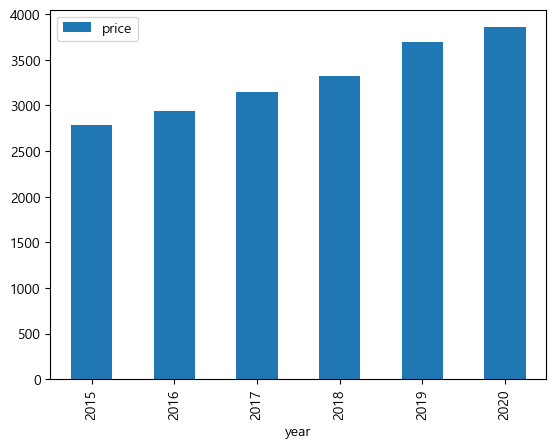

In [109]:
apt = pd.read_csv("data/20200331.csv", encoding="euc-kr")
apt.columns = ["city", "size", "year", "month", "price"] # 컬럼명 수정
apt['price']= pd.to_numeric(apt['price'].str.strip())
apt_mean= apt.groupby('year')[['price']].mean()
apt_mean.plot.bar()

In [35]:
apt1_mean= apt1.groupby('year')[['price']].mean()
apt1_mean

,price
year,
2015,2788.707819
2016,2934.250000
2017,3143.311795
2018,3326.951034
2019,3693.422149
2020,3856.074890


<AxesSubplot:>

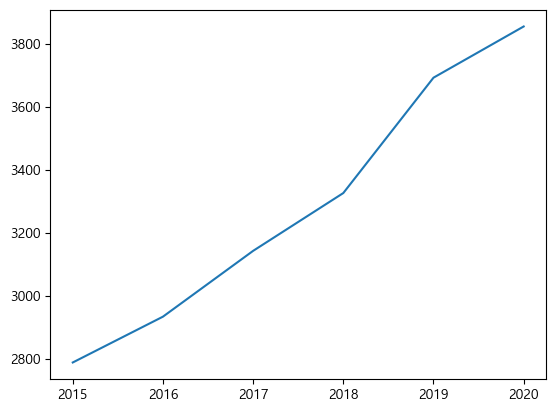

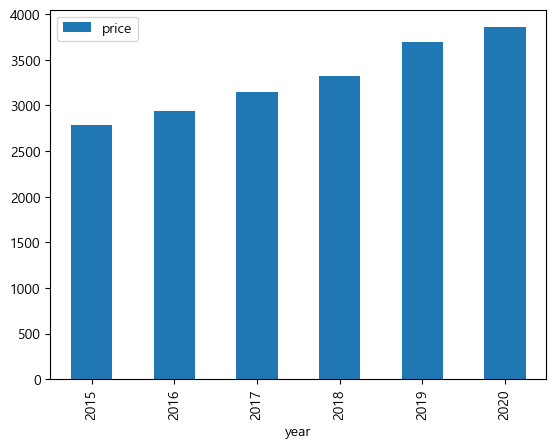

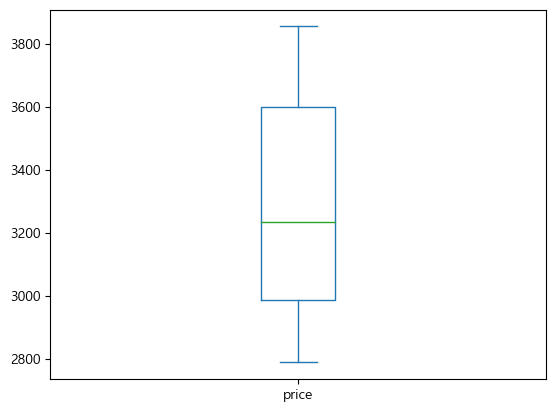

In [36]:
# Series일 때는 plot을 통해서 box접근: apt1_mean.plot.box()
plt.plot(apt1_mean)
apt1_mean.plot.bar()
apt1_mean.plot.box()

#### 2) 도시별, 연도별로 평균 가격 조회

<AxesSubplot:>

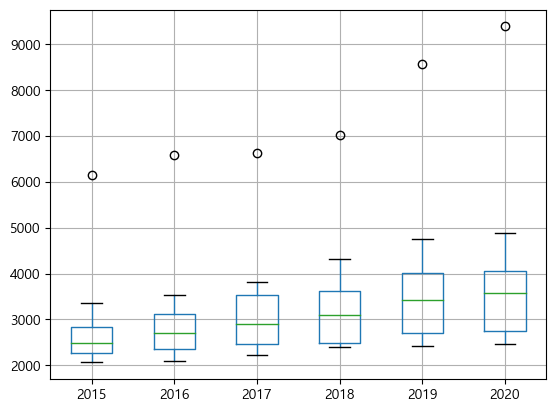

In [37]:
city_apt_mean= apt1.pivot_table('price','city','year')
city_apt_mean

city_apt_mean.boxplot()

#### 3) 서울만 선택하여 '전체'size만 조회

In [38]:
apt_seoul= apt1[(apt1['city']=='서울') & (apt1['size']=='전체')]
# %timeit apt1[(apt1['city']=='서울') & (apt1['size']=='전체')]
# %timeit apt1.query('(city=="서울") and (size=="전체")')    # sql처럼. 속도 오래걸림

####  4) apt_seoul에서 city와 size 컬럼 제거하고 다중 인덱스 설정(year,month)

보통 del 컬럼, drop 행

In [39]:
apt_seoul= apt_seoul.drop(['city','size'], axis=1)   # inplace=True
apt_seoul= apt_seoul.set_index(['year','month'])
apt_seoul

price
year month        
2015 10     5841.0
     11     6050.0
     12     6041.0
2016 1      6108.0
     2      6111.0
     3      6173.0
     4      6241.0
     5      6264.0
     6      6208.0
     7      6254.0
     8      6285.0
     9      6283.0
     10     6400.0
     11     6370.0
     12     6443.0
2017 1      6450.0
     2      6464.0
     3      6370.0
     4      6366.0
     5      6400.0
     6      6667.0
     7      6573.0
     8      6172.0
     9      6507.0
     10     6578.0
     11     6657.0
     12     6706.0
2018 1      6623.0
     2      6631.0
     3      6836.0
     4      6841.0
     5      6919.0
     6      6694.0
     7      6820.0
     8      6731.0
     9      6994.0
     10     7378.0
     11     7369.0
     12     7398.0
2019 1      7600.0
     2      7627.0
     3      7772.0
     4      7784.0
     5      7786.0
     6      8100.0
     7      8067.0
     8      8093.0
     9      8085.0
     10     8091.0
     11     8062.0
     12     7955.0
2020 1      8121.0
     2      7972.0
     3      8029.0

<AxesSubplot:xlabel='year,month'>

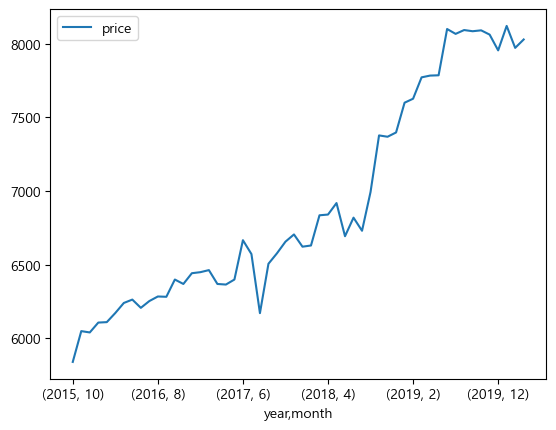

In [40]:
apt_seoul.plot()

## 7. seaborn

In [41]:
import seaborn as sns
tips= sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### 1) total_bill에 대한 금액 분포 확인
히스토그램

Text(0, 0.5, 'total_bill')

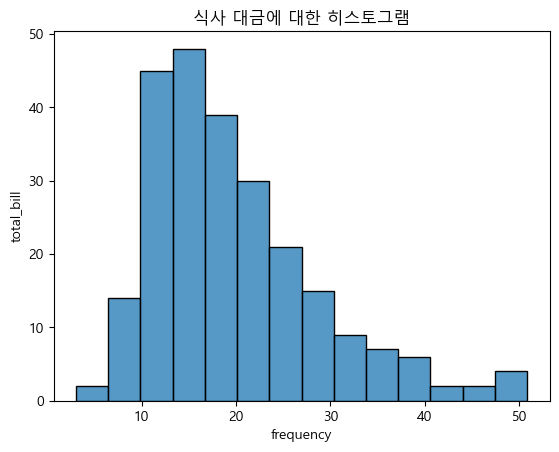

In [42]:
ax= sns.histplot(tips['total_bill'])
ax.set_title('식사 대금에 대한 히스토그램')
ax.set_xlabel('frequency')
ax.set_ylabel('total_bill')

#### 2) 요일별로 인원수를 파악
막대그래프

C:\Users\acorn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

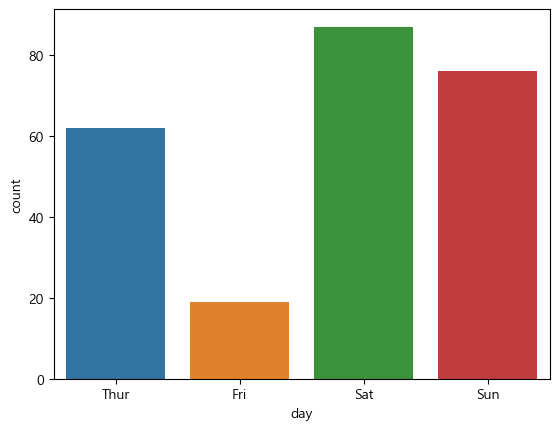

In [43]:
sns.countplot(tips['day'])

#### 3) total_bill과 tip의 관계
산포도
regplot(x=,y=,data=): 회귀분석 진행

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

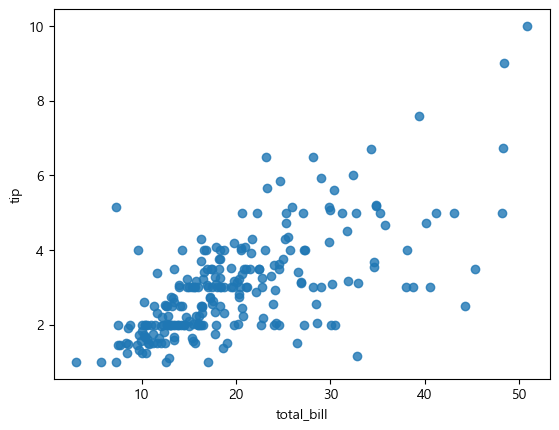

In [44]:
sns.regplot(x='total_bill', y='tip', data= tips, fit_reg=False)

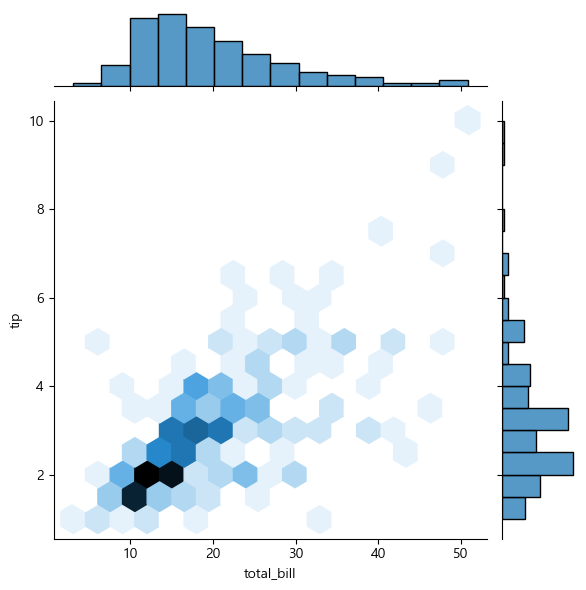

In [45]:
# 히스토그램과 산포도 결합
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

C:\Users\acorn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

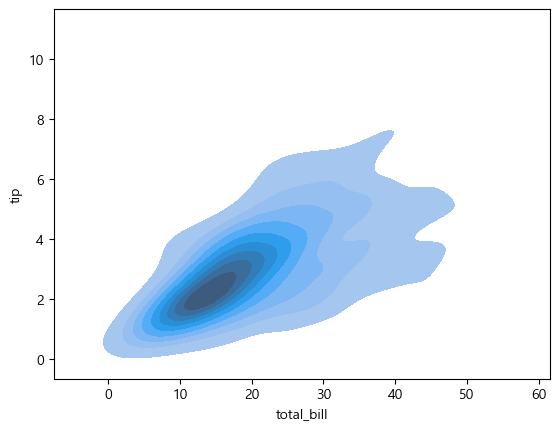

In [46]:
# kdeplot: 커널 밀도 추정
sns.kdeplot(tips.total_bill, tips.tip, shade=True)

C:\Users\acorn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time', ylabel='total_bill'>

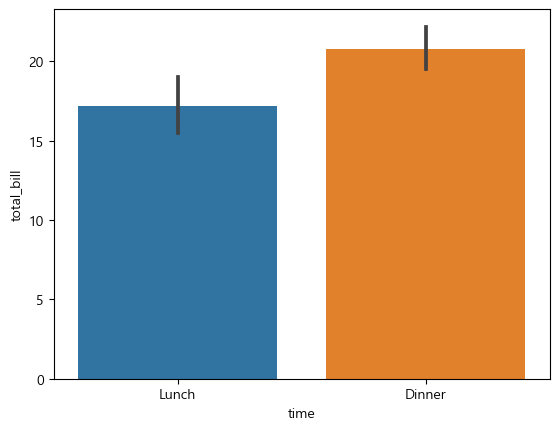

In [47]:
# 막대그래프
sns.barplot(tips.time, tips.total_bill)

C:\Users\acorn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time', ylabel='total_bill'>

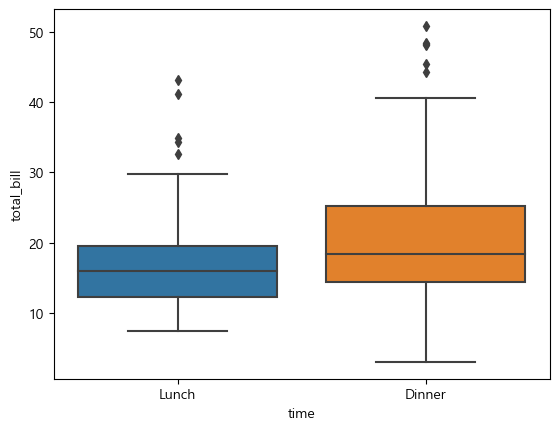

In [48]:
# 박스플랏
sns.boxplot(tips.time, tips.total_bill)

C:\Users\acorn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time', ylabel='total_bill'>

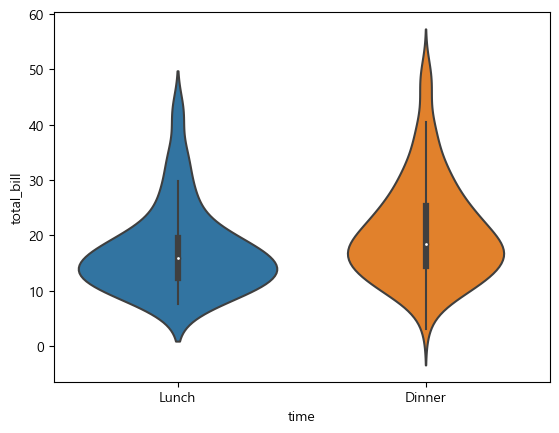

In [49]:
# 특이한 박스플랏
sns.violinplot(tips.time, tips.total_bill)

#### 5) 한번에 여러 개의 변수들에 대해 관계 확인

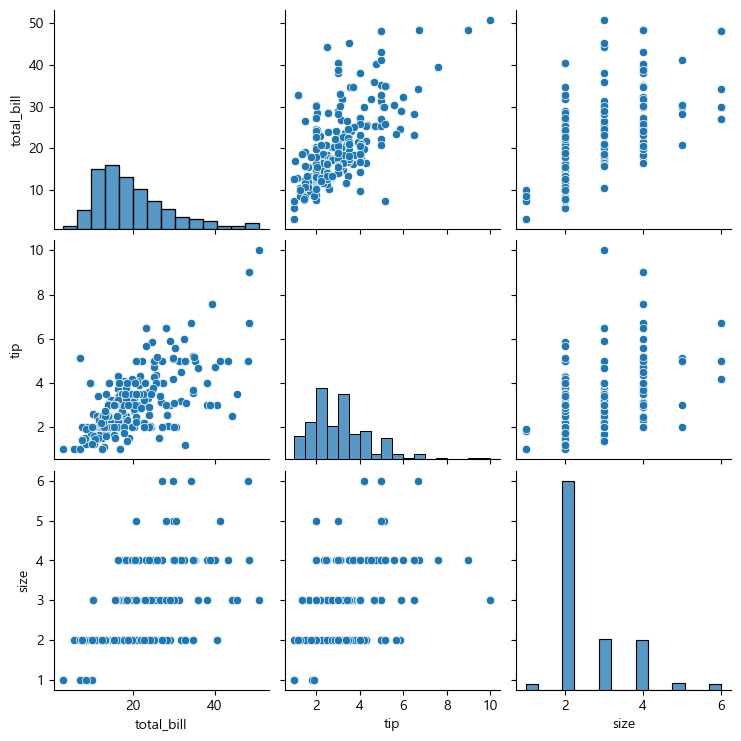

In [50]:
sns.pairplot(tips)

#### 6) 성별에 따른 total_bill과 tip의 관계를 알고 싶다.
hue를 이용해서 성별에 따라 구분 가능

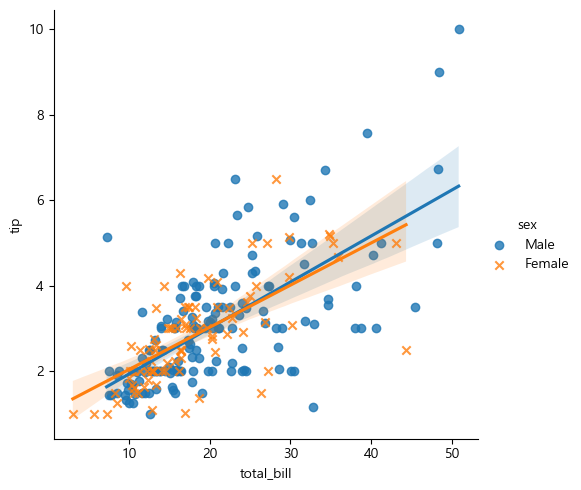

In [51]:
sns.lmplot(x='total_bill', y='tip', data= tips, hue='sex', markers=['o','x'])

## 8. 실습3
타이타닉
캐글.com/titanic

### (1) Data Definition

In [52]:
train= pd.read_csv('data/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### (2) Data Preprocessor 전처리
제일 먼저 결측치 제거

In [54]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### (3) EDA
    생존 여부와 성별 여부
    산포도 말고 막대그래프 이용

<AxesSubplot:>

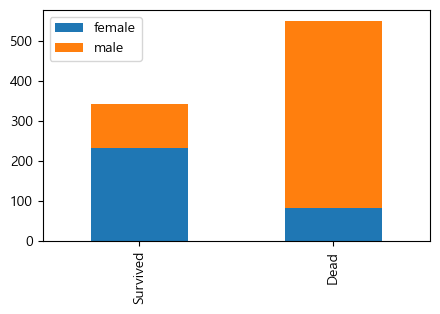

In [55]:
survived= train[train['Survived']==1]['Sex'].value_counts()
dead= train[train['Survived']==0]['Sex'].value_counts()

df= pd.DataFrame([survived, dead])
df.index= ['Survived','Dead']
df.plot.bar(stacked=True, figsize=(5,3))

<AxesSubplot:>

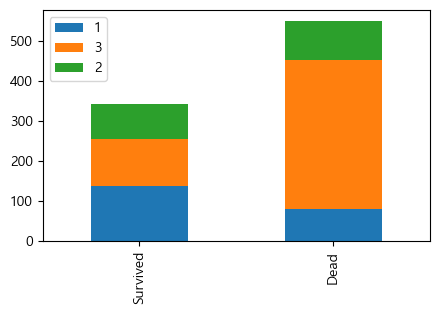

In [56]:
survived= train[train['Survived']==1]['Pclass'].value_counts()
dead= train[train['Survived']==0]['Pclass'].value_counts()
df= pd.DataFrame([survived, dead])
df.index= ['Survived','Dead']
df.plot.bar(stacked=True, figsize=(5,3))

In [57]:
def bar_chart(column):
    survived= train[train['Survived']==1][column].value_counts()
    dead= train[train['Survived']==0][column].value_counts()
    df= pd.DataFrame([survived, dead])
    df.index= ['Survived','Dead']
    df.plot.bar(stacked=True, figsize=(5,3))
#     df.plot(kind='bar',stacked=True, figsize=(5,3))
    


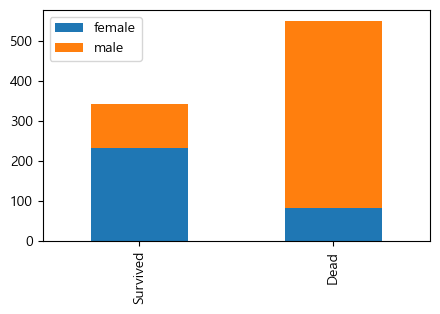

In [58]:
bar_chart('Sex')

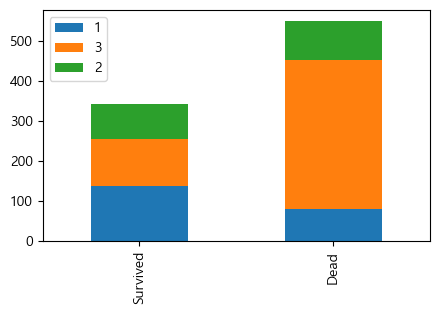

In [59]:
bar_chart('Pclass')

#### 3) 형제 자매, 배우자 동승 여부에 따른 생존 여부

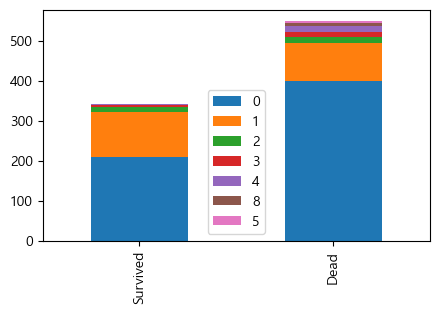

In [60]:
bar_chart('SibSp')

#### 4) 부모나 자식 동승여부에 따른 생존 여부

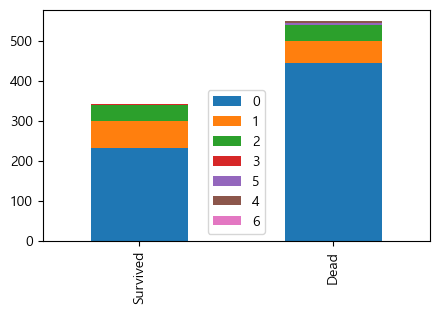

In [61]:
bar_chart('Parch')

#### 5) 경유지에 따른 생존 여부

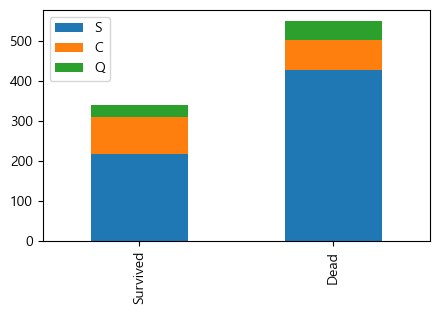

In [62]:
bar_chart('Embarked')

### (3) Feature Engineering
관련없어보이는 이름이라도 호칭에서 유의미한 데이터 도출할 수 있음

#### 1) 이름에서 호칭 추출

In [63]:
train['Title']= train['Name'].str.extract(' ([a-zA-Z]+)[.]')     # 왜 [a-zA-Z]를 괄호로 묶어야하는지?
train.head()
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [64]:
# 이름을 숫자 카테고리로 바꾸기
train['Name'].str.extract(' ([a-zA-Z]+)[.]')[0].unique()
title_map= {'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 'Don':3, 'Rev':3, 'Dr':3, 'Mme':3, 'Ms':3,
       'Major':3, 'Lady':3, 'Sir':3, 'Mlle':3, 'Col':3, 'Capt':3, 'Countess':3,
       'Jonkheer':3}

In [65]:
train['Title_map']= train['Title'].map(title_map)

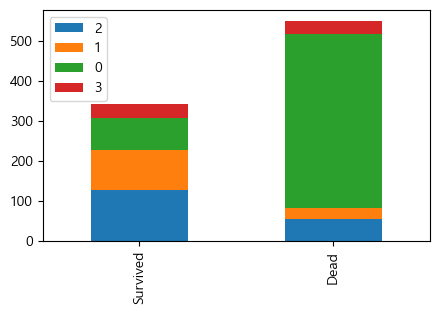

In [66]:
bar_chart('Title_map')

#### 2) Age 결측치 처리
결측치 
    1) 제거 
    2) 대체 (평균, 중앙값, ..)  -  호칭으로 여성의 결혼 유무 파악
    3) 예측

In [67]:
train.groupby('Title_map')['Age'].transform('median') # 전체값이 그룹에 따라 중앙값으로 대체됨

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [68]:
train['Age'].fillna(train.groupby('Title_map')['Age'].transform('median'), inplace=True)
# 결측치만 중앙값으로 채워주기

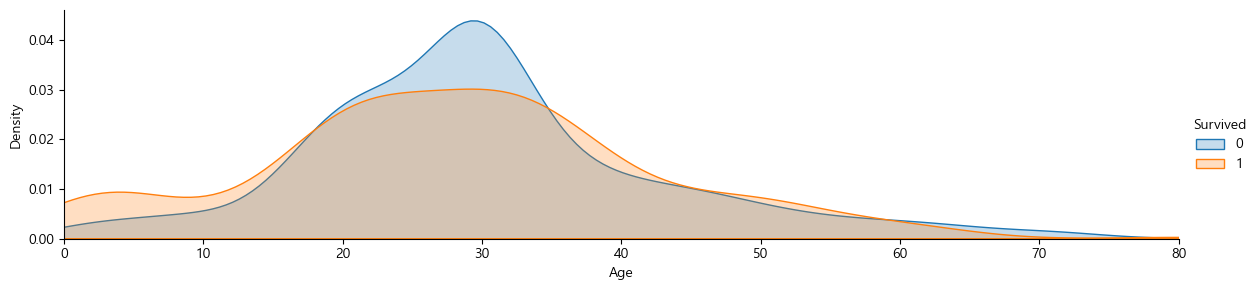

In [69]:
facet= sns.FacetGrid(train, hue='Survived', aspect=4)  # 바탕  
# hue: 다른 변수에 따라 데이터를 색상으로 구분하여 시각화 (그래프분리)  aspect: 그래프 가로 크기
facet.map(sns.kdeplot, 'Age', shade=True)
# 밀도: sns.kdeplot
facet.add_legend()  # 범례
facet.set(xlim=(0,train['Age'].max()))  # x축 범위 설정

(10.0, 40.0)

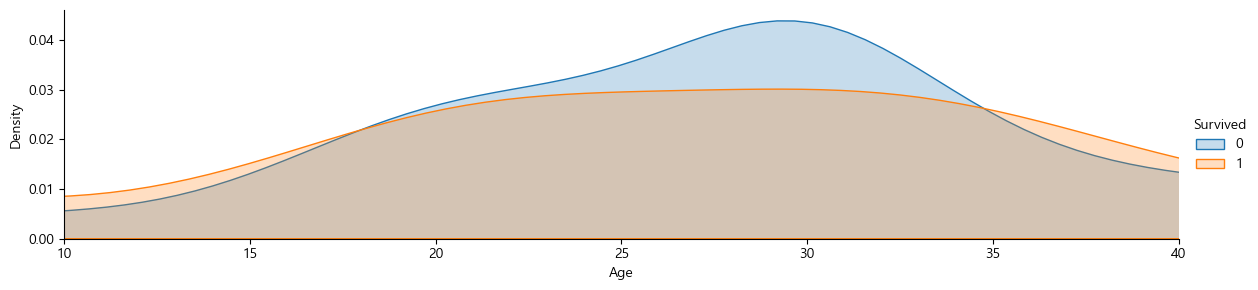

In [70]:
facet= sns.FacetGrid(train, hue='Survived', aspect=4)  # 바탕  
# hue: 다른 변수에 따라 데이터를 색상으로 구분하여 시각화 (그래프분리)  aspect: 그래프 가로 크기
facet.map(sns.kdeplot, 'Age', shade=True)
# 밀도: sns.kdeplot
facet.add_legend()  # 범례
facet.set(xlim=(0,train['Age'].max()))  # x축 범위 설정
plt.xlim(10,40) #특정 구간 확대

<AxesSubplot:xlabel='Age', ylabel='Density'>

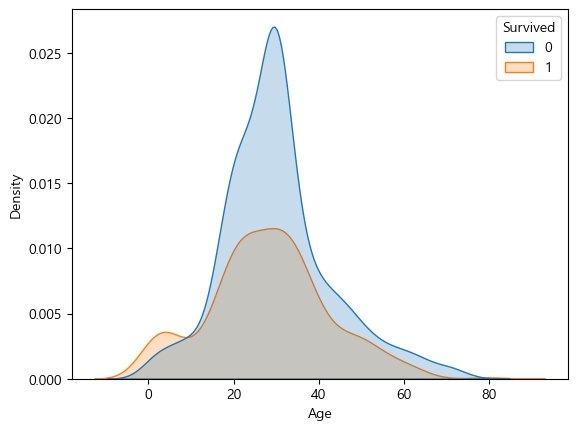

In [71]:
sns.kdeplot('Age', data= train, hue='Survived',shade=True) # Facet으로 그린 그래프와 차이 있음

In [72]:
?sns.kdeplot

In [73]:
train[train['Title']=='Master']
train[train['Age']<20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_map
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss,2
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,Miss,2
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,Master,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,Mrs,1
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S,Master,3
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,Miss,2
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S,Mr,0


## 9. 지도 시각화
pip install folium

In [74]:
import folium

In [75]:
folium.Map(location=[37.4931456,127.0284288], zoom_start=15, tiles='Stamen Toner')

### (1) 미국 50개주의 실업률 표시

In [76]:
state_unemp= pd.read_csv('C:\\kim\\python\\analysis\\data\\map\\folium_US_Unemployment_Oct2012.csv')
state_unemp

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1
5,CO,7.7
6,CT,8.4
7,DE,7.1
8,FL,8.2
9,GA,8.8


In [77]:
state_geo= 'data/map/folium_us-states.json'
map= folium.Map(location=[40,-98], zoom_start=4)
map

map.choropleth(geo_data= state_geo, data= state_unemp, key_on='feature.id',
              columns=['State','Unemployment'], fill_color='YlGn')
map

C:\Users\acorn\anaconda3\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


### (2) Marking

In [78]:
map= folium.Map(location=[37.4931456,127.0284288], zoom_start=15)
map

# marker= folium.Marker(location=[37.4931456,127.0284288], icon=folium.Icon(color='red', icon='star'))
# marker.add_to(map)
folium.Marker(location=[37.4931456,127.0284288], icon=folium.Icon(color='red', icon='star'),
             popup= '오후2시 약속장소').add_to(map)

folium.CircleMarker(location=[37.4931456,127.0284288], popup='강남역 근처', radius=50, 
                    color='#ffffgg', fill_color='#ffffgg').add_to(map)
map

### (3) 많은 내용의 팝업

In [79]:
from folium import IFrame

In [80]:
map= folium.Map(location=[37.4931456,127.0284288], zoom_start=15)
text= '''많은
내용의
팝업
'''

iframe= IFrame(text, width='300', height='200')
pop= folium.Popup(iframe, max_width=3000)

folium.Marker(location=[37.4931456,127.0284288], icon=folium.Icon(color='red', icon='star'),
             popup= pop).add_to(map)

map

## 10. WordCloud

In [81]:
from wordcloud import WordCloud, STOPWORDS

(-0.5, 399.5, 199.5, -0.5)

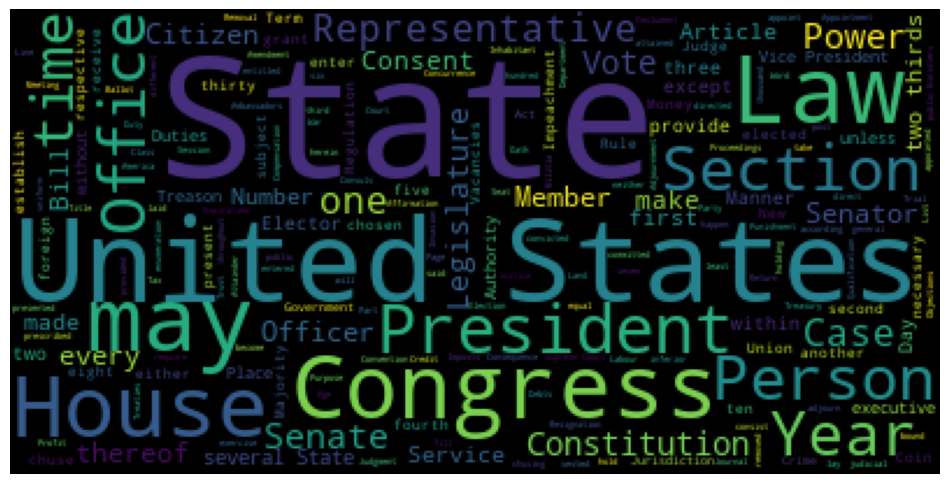

In [82]:
text= open('data/wordcloud/constitution.txt').read()
text

wc= WordCloud().generate(text)
wc.words_

plt.figure(figsize=(12,12))
plt.imshow(wc)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

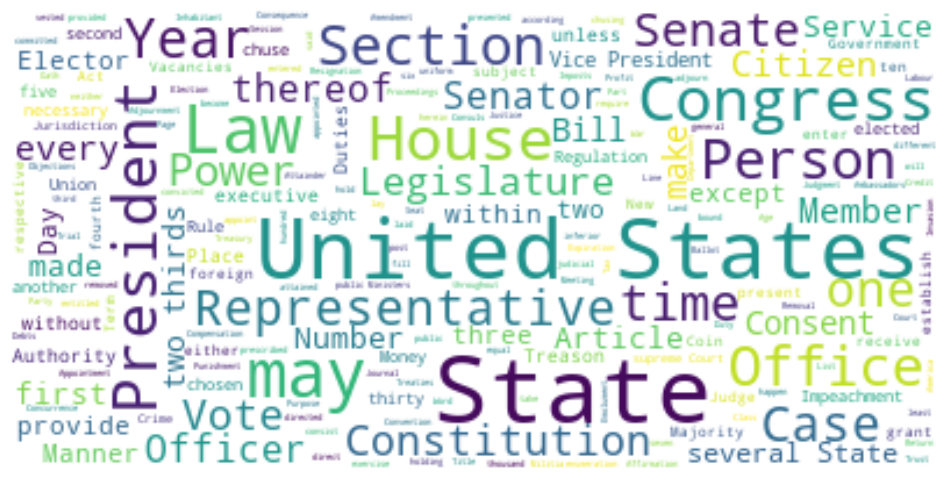

In [83]:
wc= WordCloud(max_font_size=40, background_color='white').generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

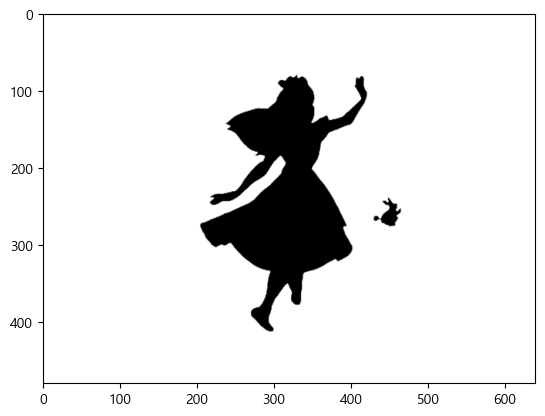

In [84]:
from PIL import Image

alice_mask= np.array(Image.open('data/wordcloud/alice_mask.png'))
plt.imshow(alice_mask)

(-0.5, 639.5, 479.5, -0.5)

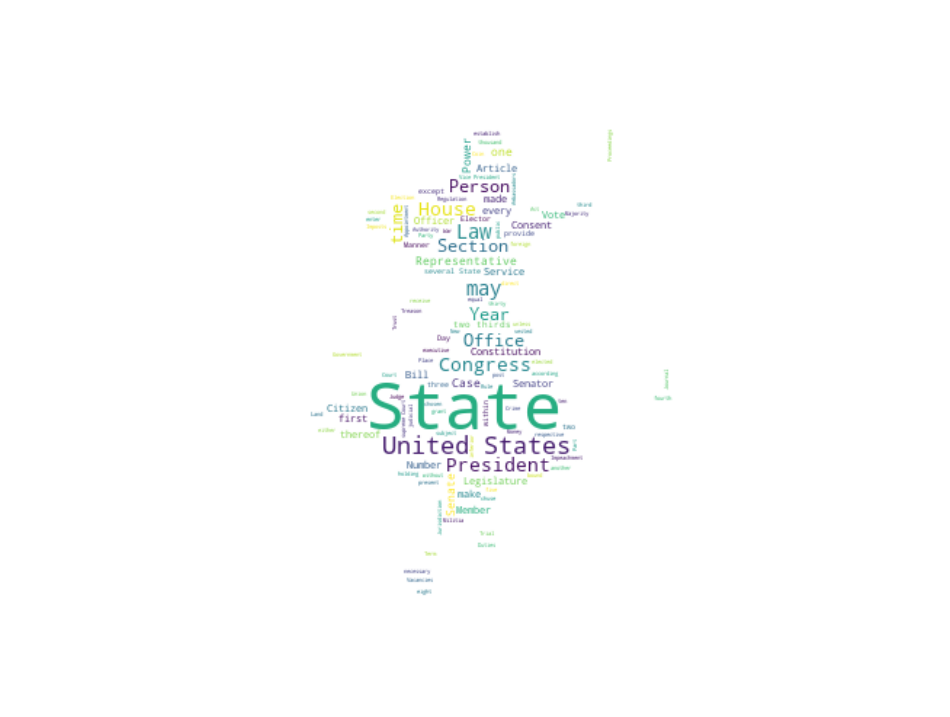

In [85]:
wc= WordCloud(max_font_size=50, background_color='white',
             mask= alice_mask).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

(-0.5, 639.5, 479.5, -0.5)

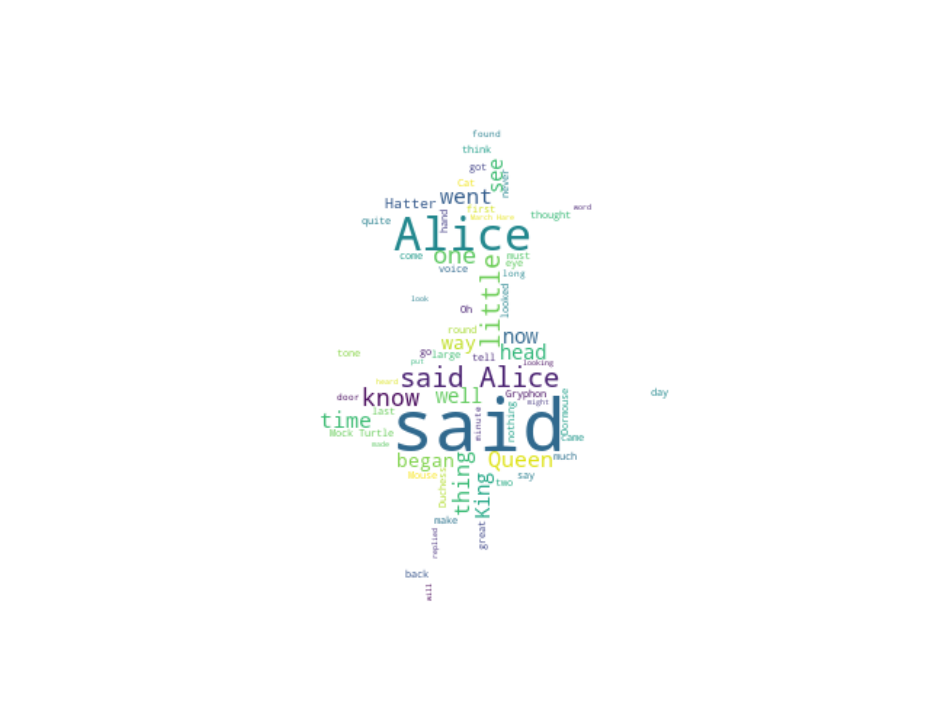

In [86]:
text= open('data/wordcloud/alice.txt').read()
text

wc= WordCloud(max_font_size=50, background_color='white',
             mask= alice_mask).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

(-0.5, 639.5, 479.5, -0.5)

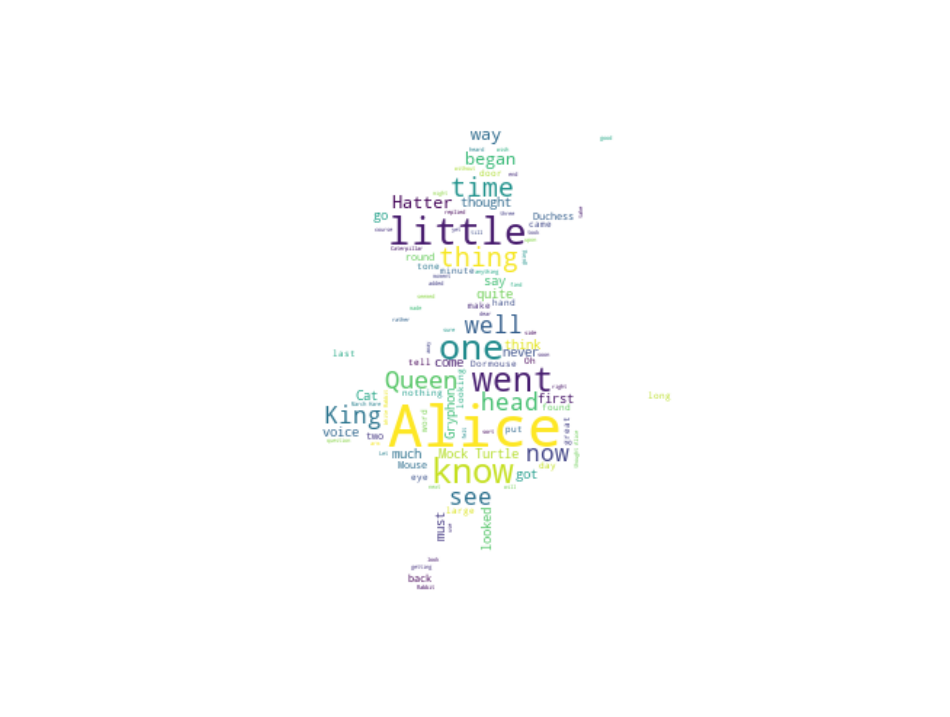

In [87]:
### 불용어 처리
STOPWORDS.add('said')

wc= WordCloud(max_font_size=40, background_color='white',
             mask= alice_mask, stopwords=STOPWORDS, max_words=100).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

(-0.5, 599.5, 799.5, -0.5)

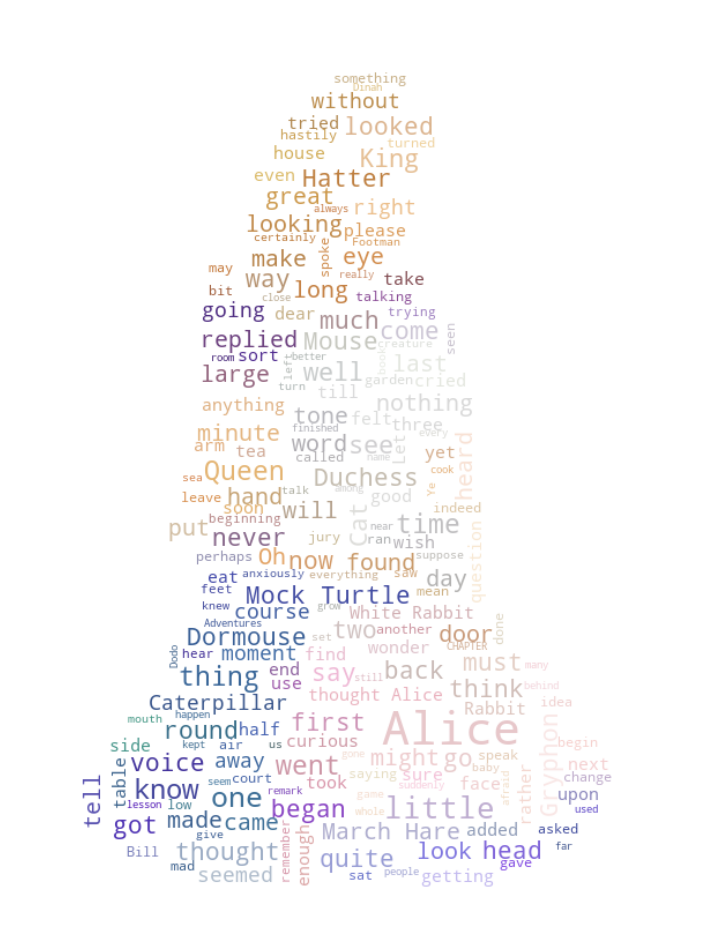

In [88]:
import wordcloud
alice_mask= np.array(Image.open('data/wordcloud/alice.png'))

wc= WordCloud(max_font_size=40, background_color='white',
             mask= alice_mask, stopwords=STOPWORDS).generate(text)

image_color= wordcloud.ImageColorGenerator(alice_mask)

plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=image_color), interpolation='bilinear')
plt.axis('off')

## 11. WordCloud의 한글 처리
pip install konlpy

In [89]:
import konlpy
from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk
from wordcloud import WordCloud

In [90]:
okt= Okt()
okt.nouns('아버지가방에들어가신다.')

['아버지', '가방']

In [91]:
# 형태소 분석

ko_text= kolaw.open('constitution.txt').read()
ko_text

token_ko= okt.nouns(ko_text)
len(token_ko)

3882

In [92]:
stop_words=['제','월','일','조','수','때','그','이','바','및','안','정','위','관']

In [93]:
token_ko= [word for word in token_ko if word not in stop_words]

In [94]:
len(token_ko)

3211

In [95]:
# 빈도수 처리(워드 카운팅)

ko= nltk.Text(token_ko, name='대한민국 헌법')
data= ko.vocab().most_common()

(-0.5, 399.5, 199.5, -0.5)

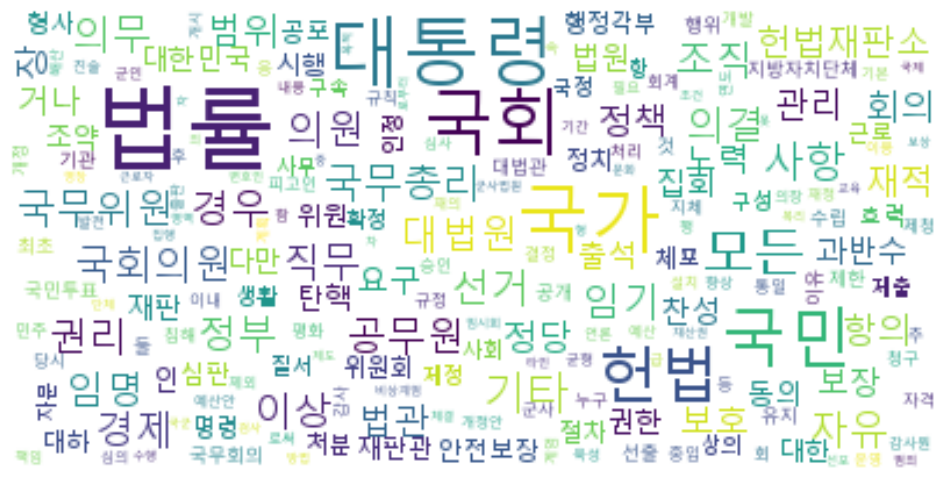

In [96]:
# 빈도수를 출력
wc= WordCloud(max_font_size=40, background_color='white', max_words=200,
             font_path='C:\\Windows\\Fonts\\malgun.ttf').generate_from_frequencies(dict(data))

image_color= wordcloud.ImageColorGenerator(alice_mask)

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

In [97]:
len(data)

917

<BarContainer object of 244 artists>

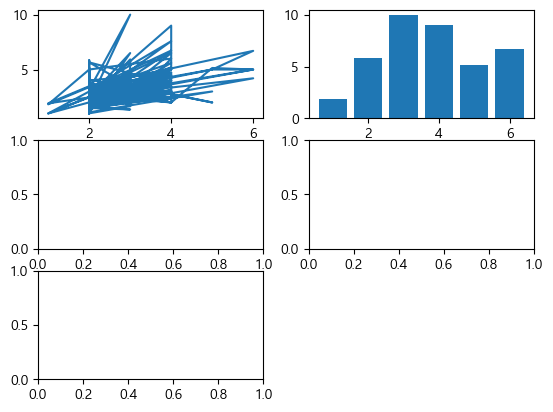

In [98]:
fig= plt.figure()
axis1= fig.add_subplot(321)
axis2= fig.add_subplot(322)
axis3= fig.add_subplot(323)
axis4= fig.add_subplot(324)
axis5= fig.add_subplot(325)
# ax.scatter(tips['size'],tips['tip'])
# ax.set_title('식사 비용과 팁에 대한 산포도')
# ax.set_xlabel('size')
# ax.set_ylabel('tip')
axis1.plot(tips['size'],tips['tip'])
axis2.bar(tips['size'],tips['tip'])

Text(0.5, 1.0, ' 성별에 따른 tip')

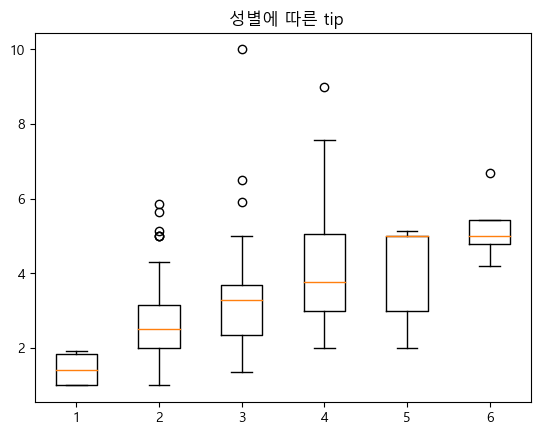

In [99]:
fig= plt.figure()
ax= fig.add_subplot(111)
ax.boxplot([tips[tips['size']==1]['tip'],
            tips[tips['size']==2]['tip'],
            tips[tips['size']==3]['tip'],
            tips[tips['size']==4]['tip'],
            tips[tips['size']==5]['tip'],
            tips[tips['size']==6]['tip']])
ax.set_title(' 성별에 따른 tip')